# Data preprocessing 2
A partir de l'image recadrée l'objectif est d'obtenir la matrice des poids 

<table>
  <tr>
    <td>   <img src="img/imgBaseDataPreprocessing2.png" alt="Sample" > </td>
    <td>   <img src="img/imgPoidsDataPreprocessing2.png" alt="Sample" > </td>
  </tr>
</table>



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


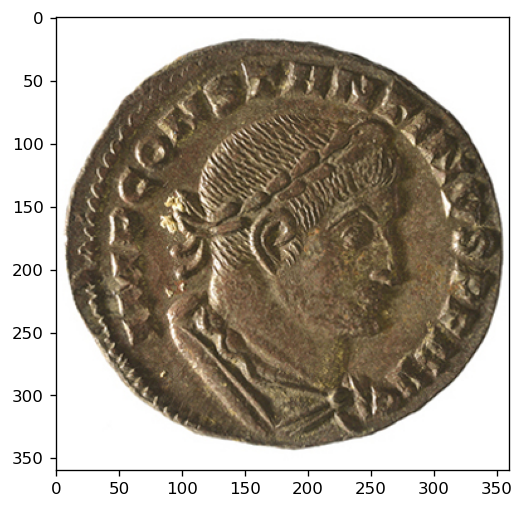

In [5]:
%load_ext autoreload
%autoreload 2

import ImageProcessing.processing as pr
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

imgPath = imagePath = "data/19_Droit.jpg"

#Utilisation du paquet
img =pr.cropToCoin(imgPath)

plt.imshow(img)
plt.show()



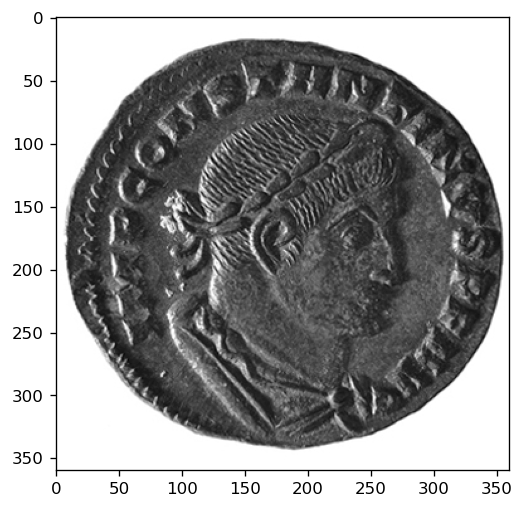

In [6]:
#transformation en nuances de gris 

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


plt.imshow(gray,cmap='gray')
plt.show()

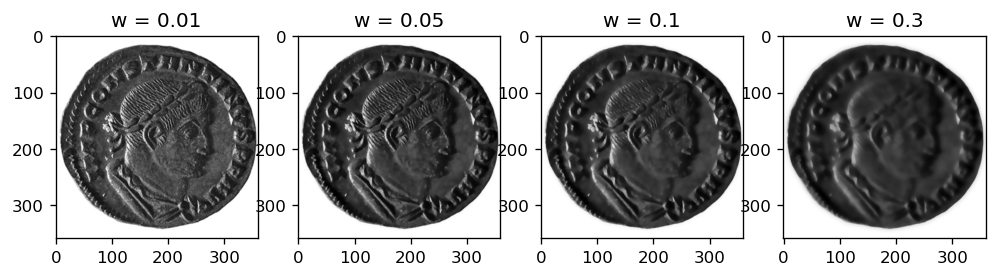

In [7]:
from skimage.restoration import denoise_tv_chambolle
## Total variation regularization

weightList  = [0.01,0.05,0.1,0.3]
for idx in range(4):
    w = weightList[idx]
    plt.subplot(1,4,idx+1)
    denoisedImg = denoise_tv_chambolle(gray,w)
    plt.title("w = "+ str(w))
    plt.imshow(denoisedImg,cmap='gray')


plt.show()

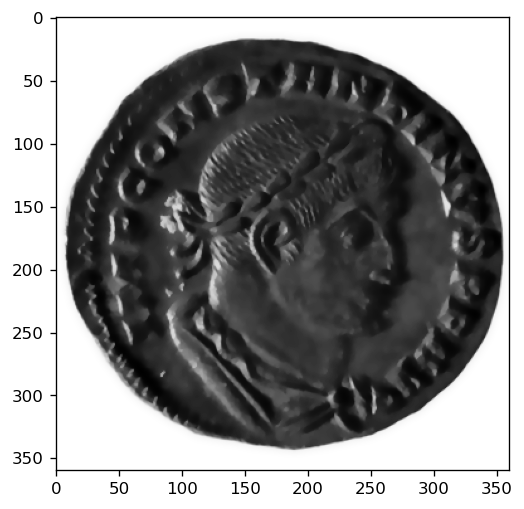

In [8]:
from skimage.restoration import denoise_tv_chambolle
#
# Total variation regularization
imgDenoise = denoise_tv_chambolle(gray,weight=0.1)
plt.imshow(imgDenoise,cmap='gray')

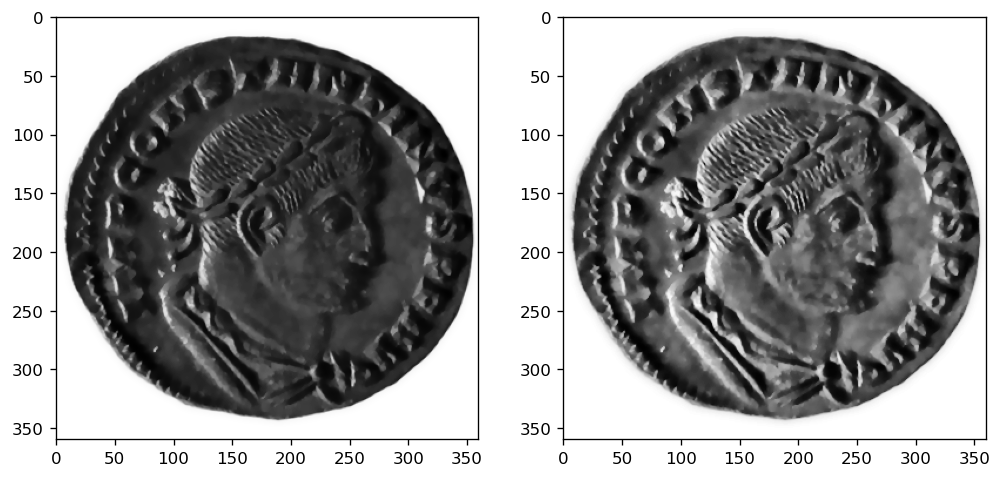

In [9]:
plt.subplot(1,2,1)
denoisedImg = denoise_tv_chambolle(gray,0.07)
plt.imshow(denoisedImg,cmap='gray')

denoisedImg = cv2.normalize(src=denoisedImg, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.subplot(1,2,2)

# create a CLAHE Object (Contrast Limited Adaptive Histogram Equalization) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(denoisedImg)

plt.imshow(cl1,cmap='gray')



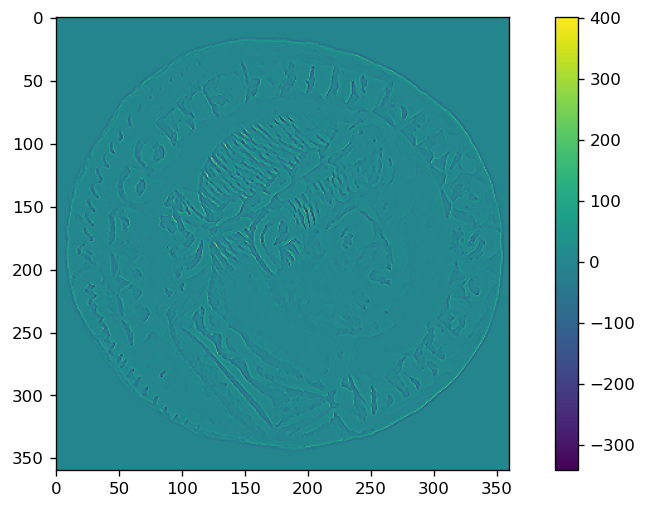

In [10]:
## detection de contours

Laplace = cv2.Laplacian(cl1,cv2.CV_64F)
plt.imshow(Laplace)
plt.colorbar()


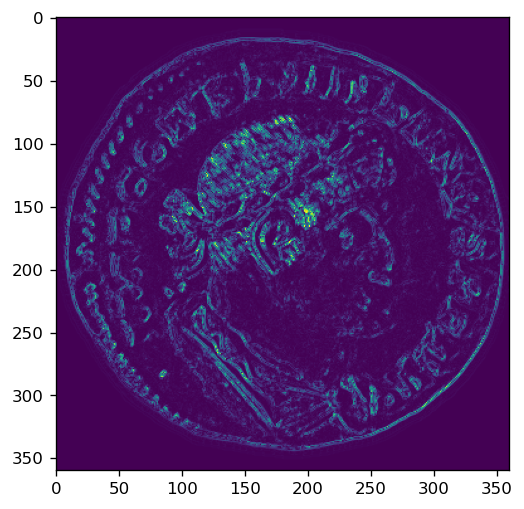

In [11]:
contours = cv2.convertScaleAbs(Laplace)
plt.imshow(contours)

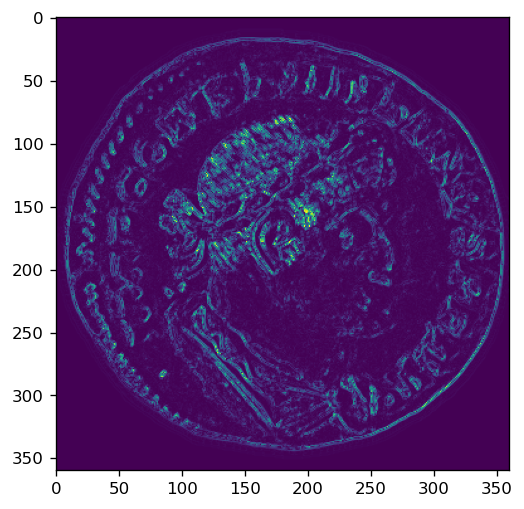

In [12]:
### implementée dans le paquet processing

contours = pr.getContour(img)
plt.imshow(contours)

## Amélioration possible :
- Filtre de sobolev ou autre https://www.mygreatlearning.com/blog/introduction-to-edge-detection/

- faire varier les paramètres
